## Kütüphaneler import ediliyor

In [2]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


## Matplotlib ile boyut ayarlanır

In [3]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

## Kullanılacak dataset import edilir

In [5]:
data = pd.read_csv('../datasets/xclara.csv')
print(data.shape)
data.head() #dataset içindeki toplam özellikleri verir

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


## Veriler V1 ve V2 değerlerine göre düzlem üzerinde görselleştirme yapılır

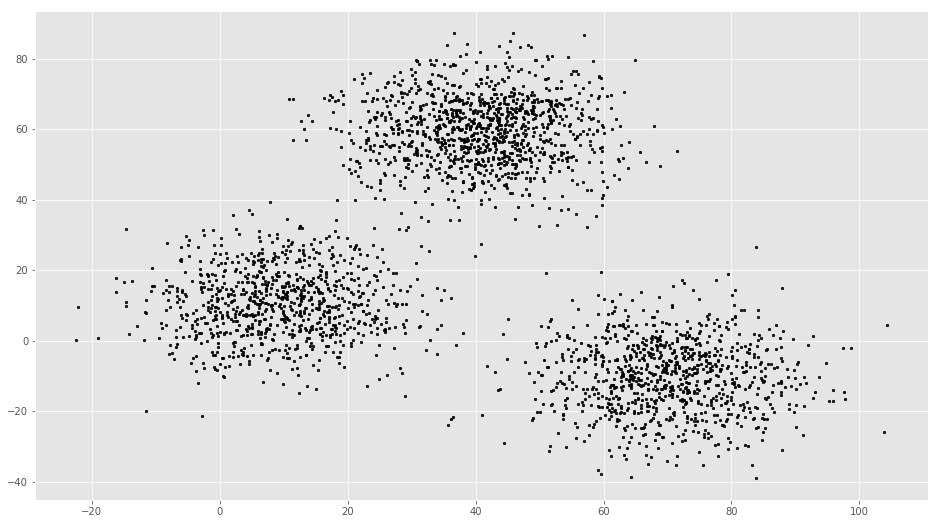

In [9]:
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

## Kümeleme işlemi için uzaklık hesabı gerekir bu yüzde öklid fonksiyonu yazılır

In [10]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

## Yukarıdaki düzlemde görüldüğü üzere 3 küme mevcuttur. Bu yüzden 3 cluster seçilir ve rastgele x - y koordinatlarından 3 centroid seçilir

In [11]:
k = 3
C_x = np.random.randint(0, np.max(X)-20, size=k)
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

In [12]:
print(C)

[[ 4. 20.]
 [39.  9.]
 [22. 32.]]


## Centroidlerin görselleştirilmesi yapılır

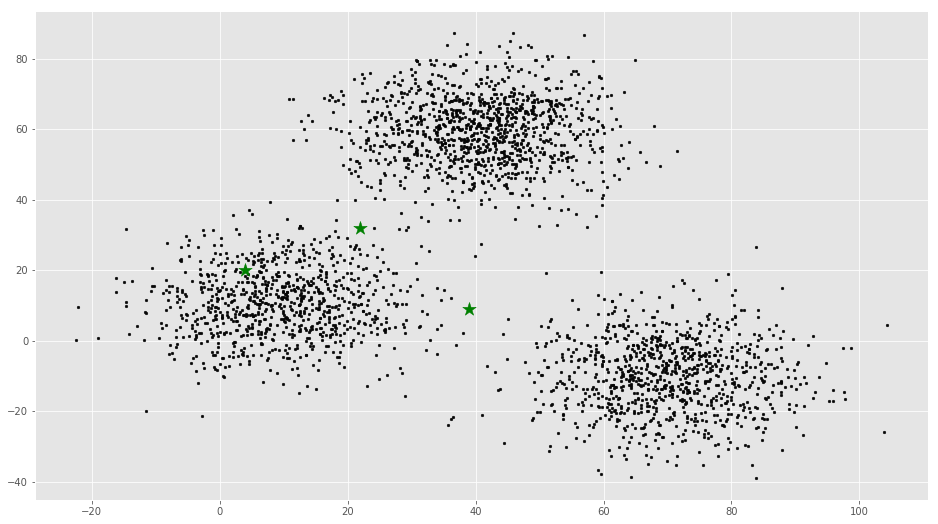

In [13]:
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

## Eski centroid bir yerde tutulur ve yeni centroid seçilir. Eski ve yeni centroidler arasındaki mesafe hesaplanır.

In [14]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
error = dist(C, C_old, None)

## Hata değeri 0 olana kadar döngü içerisinde her değeri en yakın kümeye atar ve eski centroid değerlerini kaydeder

In [15]:
while error != 0:
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    C_old = deepcopy(C)
    # Ortalama değerler ile yeni centroidler bulunur
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

## Görselleştirme yapılır

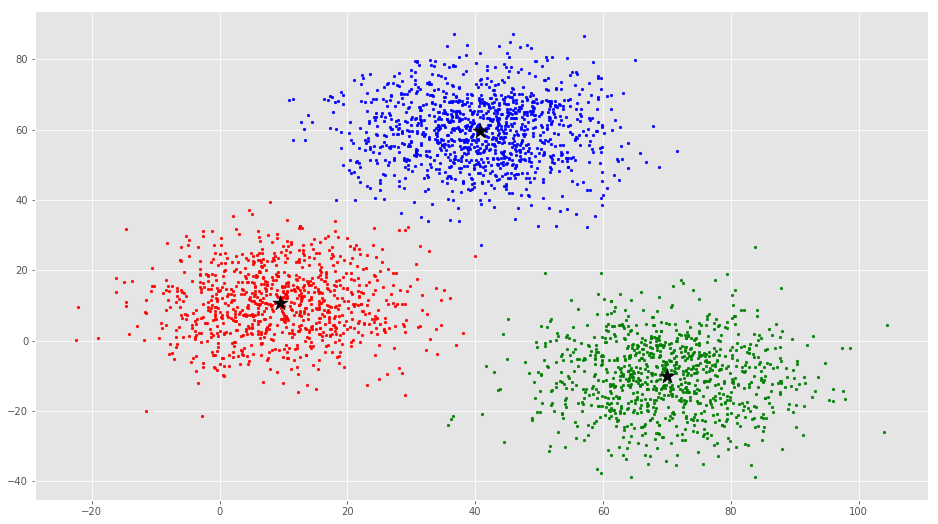

In [16]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=250, c='#050505')

# Aynı veriseti üzerinden scikit-learn kullanarak kümeleme işleminin gerçekleştirilmesi

In [17]:
# Kullanılacak modul import edilir
from sklearn.cluster import KMeans 

## Aynı dataset için model oluşturulur ve centroid belirlenir

In [18]:
kmeans = KMeans(n_clusters=3)
kmeans = kmeans.fit(X)
labels = kmeans.predict(X)
centroids = kmeans.cluster_centers_ 

## Görüleceği üzere sadece sıralamaları farklı olan cluster mevcuttur

In [19]:
print(C)

[[  9.478045  10.686052]
 [ 69.92419  -10.119641]
 [ 40.683628  59.715893]]


In [20]:
print(centroids)

[[  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]]


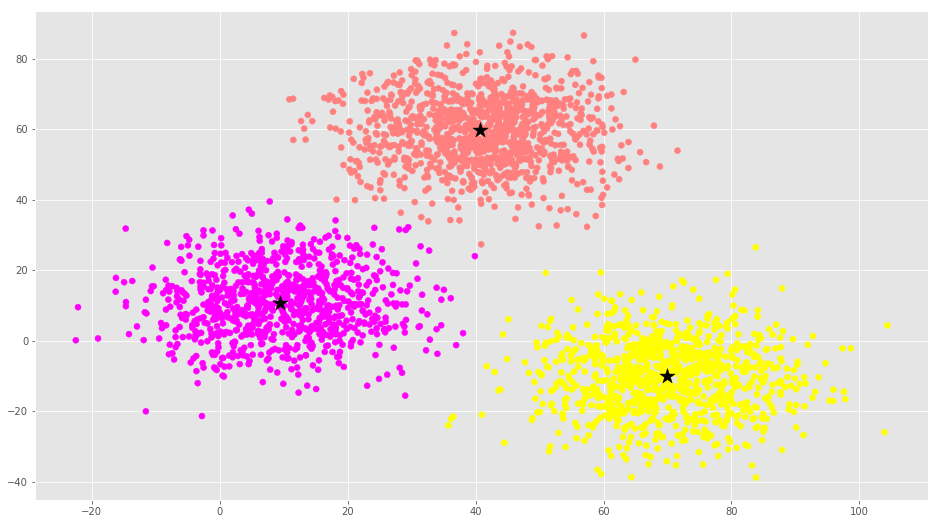

In [21]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_ ,cmap="spring")
plt.scatter(centroids[:,0] ,centroids[:,1], color='black',marker='*',s=250)
